In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [4]:
data=pd.read_csv("creditcard.csv")

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [6]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

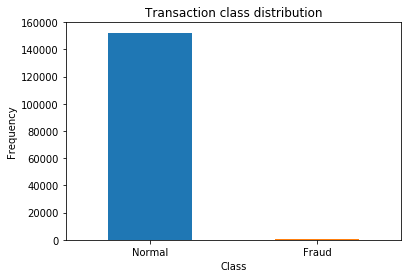

In [24]:
LABELS = ["Normal", "Fraud"]
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [25]:
x = data.iloc[: , 1:30].values
y = data.iloc[:, 30].values
y

array([ 0.,  0.,  0., ...,  0.,  0., nan])

In [16]:
print("Input Shape : ", x.shape)
print("Output Shape : ", y.shape)

Input Shape :  (152629, 29)
Output Shape :  (152629,)


In [17]:
print ("Labels : \n", y)

Labels : 
 [ 0.  0.  0. ...  0.  0. nan]


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer

#MISSING VALUE TREATEMENT

In [19]:
imputer = Imputer(missing_values="NaN", strategy="mean", axis=0)
imputer = imputer.fit(x[:, 1:30])
x[:, 1:30] = imputer.fit_transform(x[:, 1:30])

#CREATION TEST AND TRANING DATASET


In [20]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state = 0)

In [21]:
print("xtrain.shape : ", xtrain.shape)
print("xtest.shape  : ", xtest.shape)
print("ytrain.shape : ", ytrain.shape)
print("xtest.shape  : ", xtest.shape)

xtrain.shape :  (114471, 29)
xtest.shape  :  (38158, 29)
ytrain.shape :  (114471,)
xtest.shape  :  (38158, 29)


**FEATURE SCALING **

In [22]:
scale_x = StandardScaler()
xtrain = scale_x.fit_transform(xtrain)
xtest = scale_x.transform(xtest)


In [12]:
print("Standardised Training Set : \n", xtrain[0])

Standardised Training Set : 
 [ 1.04272047  0.06657394 -1.19051456  0.05060912  0.18235446 -1.31399333
  0.58133086 -0.40257892 -0.09319222  0.16481198  1.60036637  1.18028602
 -0.24273404  1.08764203 -0.35935009 -0.76863613 -0.28881862 -0.39536117
  0.13774039 -0.34055771  0.32484688  1.13026957  0.03716189  0.90724443
  0.61754959  0.39904973 -0.21031503 -0.2607924  -0.35356699]


In [13]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [14]:
model = Sequential()
model.add(Dense(12, input_dim=29, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [15]:
from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [16]:

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

# fit the model
history = model.fit(xtrain, ytrain, validation_split=0.3, epochs=10, verbose=0)

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(xtest, ytest, verbose=0)

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                360       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 473
Trainable params: 473
Non-trainable params: 0
_________________________________________________________________


In [23]:
y_pred = model.predict(xtest)
y_pred = (y_pred > 0.5)
score = model.evaluate(xtest, ytest)
score

71202/71202 [==============================] - 2s 29us/step


[0.0032893765739633036,
 0.9994101524353027,
 0.04297693818807602,
 0.04312668368220329,
 0.04290206730365753]

**Confusion Matrix**

In [38]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.83      0.82      0.82       120

    accuracy                           1.00     71202
   macro avg       0.92      0.91      0.91     71202
weighted avg       1.00      1.00      1.00     71202



Test Data Accuracy:0.9994


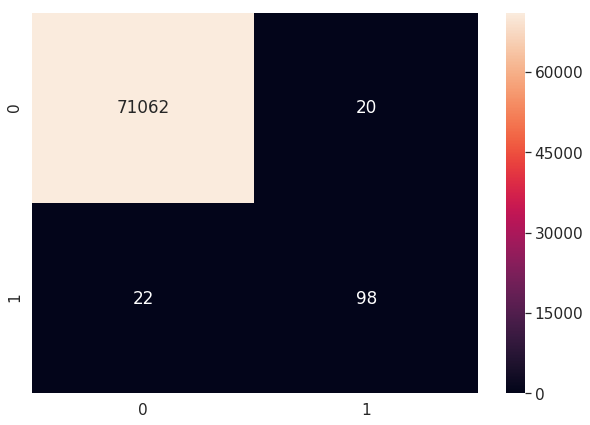

In [40]:
cf=confusion_matrix(ytest,y_pred)
df=pd.DataFrame(cf,index=(0,1),columns=(0,1))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(df,annot=True,fmt='g')
print("Test Data Accuracy:%0.4f"%accuracy_score(ytest,y_pred))